<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/12_Manifold_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept

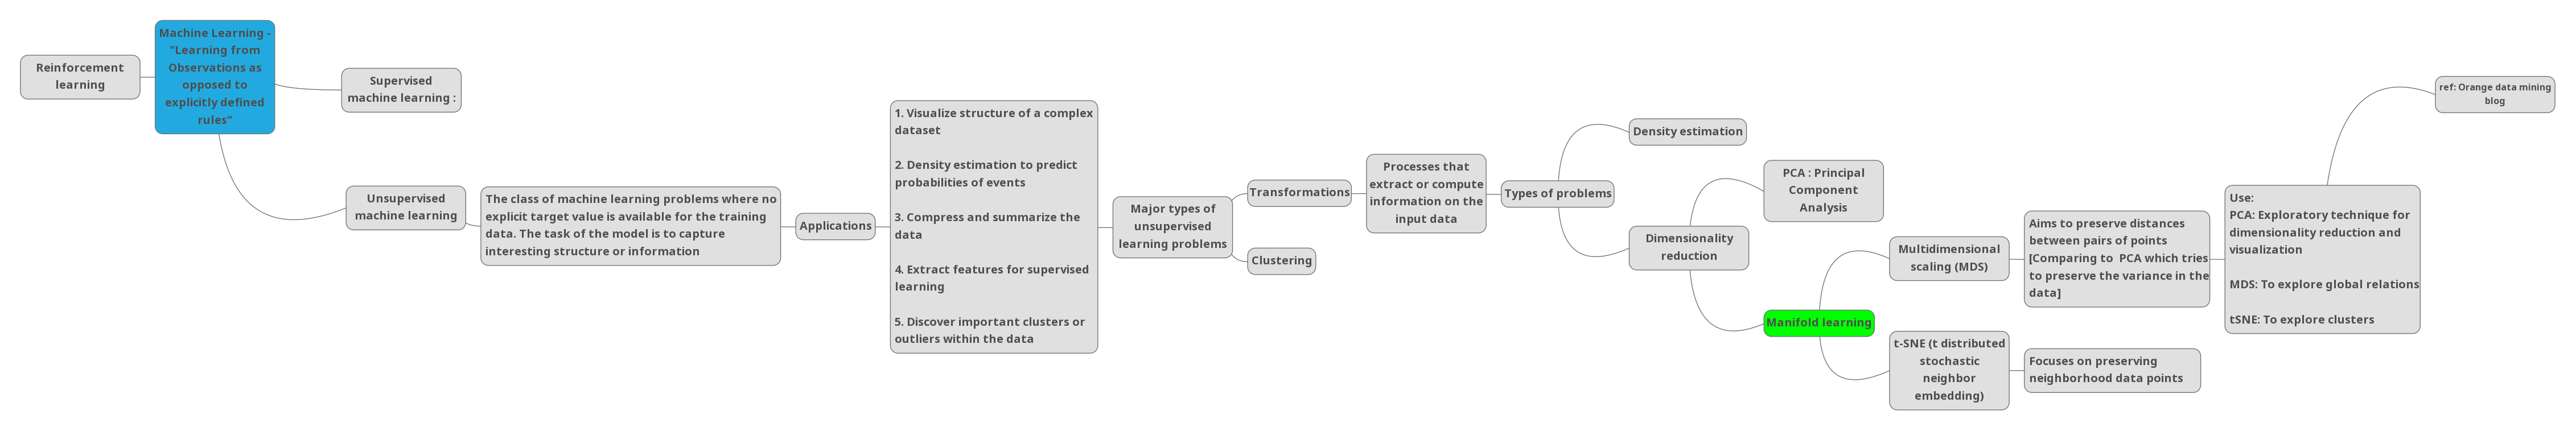

## Setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer,make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cp '/content/drive/My Drive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/fruit_data_with_colors.txt' .

## Case studies

### Multidimensional Scaling (MDS)

A [great explainer](https://www.youtube.com/watch?v=GEn-_dAyYME) on MDS by Josh Starmer: 

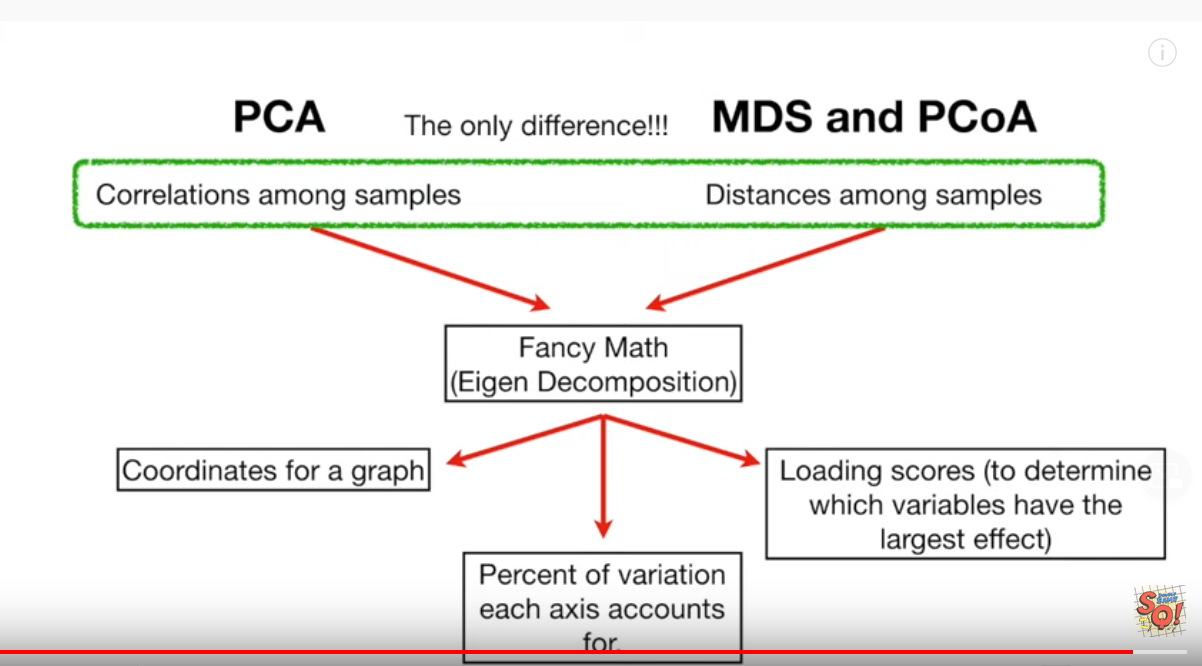

In [ ]:
from sklearn.manifold import MDS

#### Fruits

In [ ]:
FruitsData = pd.read_table('fruit_data_with_colors.txt')

In [ ]:
FruitsData.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
fruitfeatures = ['mass','width','height','color_score']

In [ ]:
X_fruits,y_fruits = FruitsData[fruitfeatures],FruitsData['fruit_label']

In [ ]:
scaler = StandardScaler()

In [ ]:
X_fruits_scaled = scaler.fit_transform(X_fruits)

In [ ]:
mds = MDS(
    n_components=2
)
FruitsMDS = mds.fit_transform(X_fruits_scaled)

Comparing with PCA on fruits

In [ ]:
pca = PCA(
    n_components=2    
)
pca = pca.fit(X_fruits_scaled)
FruitsPCA = pca.transform(X_fruits_scaled)

Text(0.5, 1.0, 'PCA on fruits dataset')

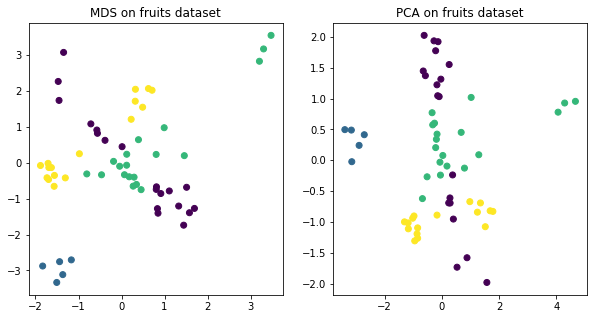

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(FruitsMDS[:,0],FruitsMDS[:,1],c=y_fruits)
plt.title('MDS on fruits dataset')

plt.subplot(1,2,2)
plt.scatter(FruitsPCA[:,0],FruitsPCA[:,1],c=y_fruits)
plt.title('PCA on fruits dataset')

#### Breast Cancer Dataset

In [ ]:
CancerData = load_breast_cancer()

In [ ]:
X_cancer,y_cancer = load_breast_cancer(return_X_y=True)

In [ ]:
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

In [ ]:
mds = MDS(n_components=2)
mds = mds.fit(X_cancer_scaled)

In [ ]:
CancerMDS = mds.transform(X_cancer_scaled)

Text(0.5, 1.0, 'MDS on breast cancer dataset')

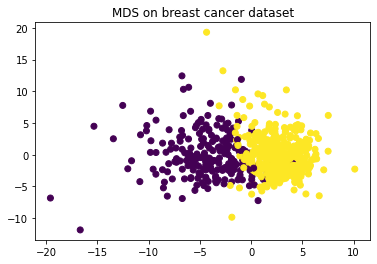

In [ ]:
plt.scatter(CancerMDS[:,0],CancerMDS[:,1],c=y_cancer)
plt.title('MDS on breast cancer dataset')

MDS is able to nicely group samples of each class together. 

* Comparison with PCA on the same data

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_cancer_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
CancerPCA = pca.transform(X_cancer_scaled)

Text(0.5, 1.0, 'PCA on Cancer data')

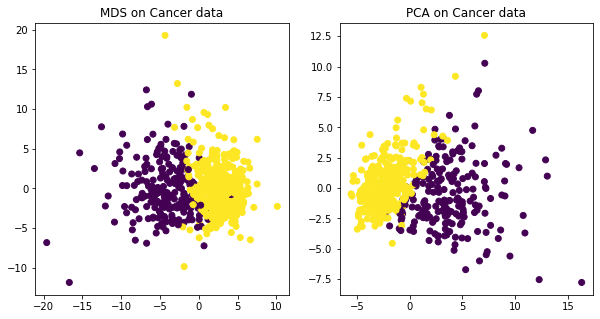

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(CancerMDS[:,0],CancerMDS[:,1],c=y_cancer)
# plt.gca().invert_yaxis()
# plt.xlim([-5,15])
plt.title('MDS on Cancer data')

plt.subplot(1,2,2)
plt.scatter(CancerPCA[:,0],CancerPCA[:,1],c=y_cancer)
plt.title('PCA on Cancer data')


* Question: MDS with eucledian distance metric (default) should give the same results as PCA as per a bunch of sources. However that doesn't seem to be the case. 



### t-SNE (t-distributed Stochastic Neighbor Embedding)

In [ ]:
from sklearn.manifold import TSNE

#### Fruits dataset

In [ ]:
tsne = TSNE(n_components=2)

In [ ]:
FruitsTSNE = tsne.fit_transform(X_fruits_scaled)

Text(0.5, 1.0, 'tSNE on fruits data')

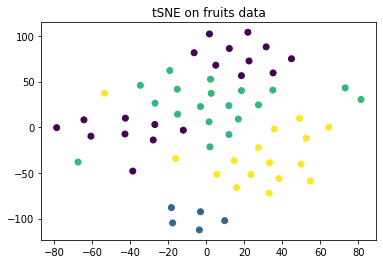

In [ ]:
plt.scatter(FruitsTSNE[:,0],FruitsTSNE[:,1],c=y_fruits)
plt.title('tSNE on fruits data')

#### Breast Cancer Dataset

In [ ]:
tsne = TSNE(n_components=2)
CancerTSNE = tsne.fit_transform(X_cancer_scaled)

Text(0.5, 1.0, 'tSNE on Breast Cancer dataset')

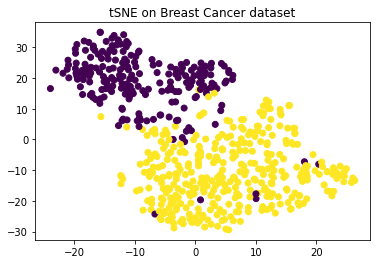

In [ ]:
plt.scatter(CancerTSNE[:,0],CancerTSNE[:,1],c=y_cancer)
plt.title('tSNE on Breast Cancer dataset')

## References & further reading:

References:
1. Applied Data Science in Python Course - Coursera



